<a id='top'></a>

# 21st Club Tableau Melting

![title](../../img/21st_club.png)

## Notebook Set Up

### Import Dependencies

In [1]:
# Python ≥3.5 (ideally)
import platform
import sys, getopt
assert sys.version_info >= (3, 5)
import csv

# Import Dependencies
%matplotlib inline

# Math Operations
import numpy as np
from math import pi

# Datetime
import datetime
from datetime import date
import time

# Data Preprocessing
import pandas as pd    # version 1.0.3
import os    #  used to read the csv filenames
import re
import random
from io import BytesIO
from pathlib import Path

# Reading directories
import glob
import os
from os.path import basename

# Working with JSON
import json
from pandas.io.json import json_normalize

# Web Scraping
import requests
from bs4 import BeautifulSoup
import re

# Fuzzy Matching - Record Linkage
import recordlinkage
import jellyfish
import numexpr as ne

# Data Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')
import missingno as msno    # visually display missing data

# Progress Bar
from tqdm import tqdm    # a clean progress bar library

# Display in Jupyter
from IPython.display import Image, YouTubeVideo
from IPython.core.display import HTML

# Ignore Warnings
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

print('Setup Complete')

Setup Complete


In [2]:
# Python / module versions used here for reference
print('Python: {}'.format(platform.python_version()))
print('NumPy: {}'.format(np.__version__))
print('pandas: {}'.format(pd.__version__))
print('matplotlib: {}'.format(mpl.__version__))
print('Seaborn: {}'.format(sns.__version__))

Python: 3.7.6
NumPy: 1.18.1
pandas: 1.0.1
matplotlib: 3.1.3
Seaborn: 0.10.0


### Defined Variables

In [3]:
# Define today's date
today = datetime.datetime.now().strftime('%d/%m/%Y').replace('/', '')

### Defined Filepaths

In [4]:
# Set up initial paths to subfolders
base_dir = os.path.join('..', '..')
data_dir = os.path.join(base_dir, 'data')
data_dir_21st_club = os.path.join(base_dir, 'data', '21st_club')
data_dir_tm = os.path.join(base_dir, 'data', 'tm')
img_dir = os.path.join(base_dir, 'img')
fig_dir = os.path.join(base_dir, 'img', 'fig')
video_dir = os.path.join(base_dir, 'video')

---

<a id='section2'></a>

## Data Source

In [17]:
# Import CSV file as a pandas DataFrame, df_21stclub_raw

## Define filepath
filepath_data = os.path.join(data_dir, 'export/tableau_export_21st_club_tm_england.csv')

In [18]:
filepath_data

'../../data/export/tableau_export_21st_club_tm_england.csv'

In [19]:
## Create DataFrame
df_21stclub_tableau_raw = pd.read_csv(filepath_data)

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xff in position 0: invalid start byte

In [16]:
df_21stclub_tableau_raw.head()

,season,competition_id,competition,player_id,name,team_id,team,age,nationality,height,...,saves,aerial_duels_att,aerial_duels_att_won,ground_duels_att,ground_duels_att_won,aerial_duels_def,aerial_duels_def_won,ground_duels_def,ground_duels_def_won,value
0,2018/2019,70,Championship,173879,Tamaraebi Abraham,7,Aston Villa,22.0,England,190.0,...,0,266,109,125,59,35,22,40,24,1000000
1,2018/2019,70,Championship,172649,Dean Henderson,49,Sheffield United,23.0,England,188.0,...,115,5,4,7,7,18,1,0,0,1000000
2,2018/2019,70,Championship,108416,John Egan,49,Sheffield United,27.0,Republic of Ireland,185.0,...,0,69,37,21,17,240,82,57,32,1000000
3,2018/2019,70,Championship,184341,Mason Mount,24,Derby County,21.0,England,178.0,...,0,52,13,106,43,15,10,74,39,1000000
4,2018/2019,70,Championship,146610,Jack O'Connell,49,Sheffield United,26.0,England,190.0,...,0,49,25,29,25,245,73,30,19,1000000


### <a id='#section3.3'>3.4. Preliminary Data Handling</a>
Let's quality of the dataset by looking first and last rows in pandas using the [head()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html) and [tail()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.tail.html) methods.

In [6]:
# Display the first 5 rows of the raw DataFrame, df_21stclub_raw
df_21stclub_raw.head()

,season,competition_id,competition,player_id,name,team_id,team,age,nationality,height,...,clearances,saves,aerial_duels_att,aerial_duels_att_won,ground_duels_att,ground_duels_att_won,aerial_duels_def,aerial_duels_def_won,ground_duels_def,ground_duels_def_won
0,2018/2019,70,Championship,173879,Tamaraebi Abraham,7,Aston Villa,22.0,England,190.0,...,45,0,266,109,125,59,35,22,40,24
1,2018/2019,70,Championship,172649,Dean Henderson,49,Sheffield United,23.0,England,188.0,...,21,115,5,4,7,7,18,1,0,0
2,2018/2019,70,Championship,108416,John Egan,49,Sheffield United,27.0,Republic of Ireland,185.0,...,258,0,69,37,21,17,240,82,57,32
3,2018/2019,70,Championship,184341,Mason Mount,24,Derby County,21.0,England,178.0,...,29,0,52,13,106,43,15,10,74,39
4,2018/2019,70,Championship,146610,Jack O'Connell,49,Sheffield United,26.0,England,190.0,...,198,0,49,25,29,25,245,73,30,19


In [7]:
# Display the last 5 rows of the raw DataFrame, df_21stclub_raw
df_21stclub_raw.tail()

,season,competition_id,competition,player_id,name,team_id,team,age,nationality,height,...,clearances,saves,aerial_duels_att,aerial_duels_att_won,ground_duels_att,ground_duels_att_won,aerial_duels_def,aerial_duels_def_won,ground_duels_def,ground_duels_def_won
2626,2019/2020,32,League Two,223827,Daniel Ballard,46,Swindon Town,20.0,Northern Ireland,187.0,...,0,0,0,0,0,0,0,0,0,0
2627,2019/2020,32,League Two,217199,Jack Kiersey,42,Walsall,21.0,England,NaN,...,0,0,1,1,0,0,4,1,1,0
2628,2018/2019,70,Championship,221824,Lewis Walker,52,Queens Park Rangers,22.0,England,NaN,...,0,0,3,2,3,0,1,1,1,1
2629,2018/2019,70,Championship,209412,Ryan East,108,Reading,22.0,England,NaN,...,0,0,0,0,1,1,0,0,0,0
2630,2018/2019,70,Championship,435858,Fraser Preston,19,Sheffield Wednesday,21.0,Scotland,NaN,...,0,0,2,0,0,0,0,0,0,0


In [8]:
# Print the shape of the raw DataFrame, df_21stclub_raw
print(df_21stclub_raw.shape)

(2631, 70)


In [9]:
# Print the column names of the raw DataFrame, df_21stclub_raw
print(df_21stclub_raw.columns)

Index(['season', 'competition_id', 'competition', 'player_id', 'name',
       'team_id', 'team', 'age', 'nationality', 'height', 'weight',
       'preferred_foot', 'position', 'detailed_position', 'goals', 'assists',
       'position_am_perc', 'position_cb_perc', 'position_cf_perc',
       'position_cm_perc', 'position_dm_perc', 'position_gk_perc',
       'position_lb_perc', 'position_lw_perc', 'position_rb_perc',
       'position_rw_perc', 'play_time', 'ball_in_play_time', 'shots',
       'shots_open_play', 'shots_open_play_box', 'shots_op_left_foot',
       'shots_op_right_foot', 'shots_op_head', 'crosses', 'crosses_open_play',
       'crosses_op_successful', 'crosses_op_left', 'crosses_op_right',
       'passes', 'passes_open_play', 'passes_op_successful', 'passes_op_head',
       'passes_op_head_successful', 'passes_op_final_third',
       'passes_op_final_third_successful', 'passes_op_box',
       'passes_op_box_successful', 'launches', 'launches_successful',
       'carries', 'ca

The dataset has six features (columns). Full details of these attributes can be found in the [Data Dictionary](section3.3.1).

In [10]:
# Data types of the features of the raw DataFrame, df_21stclub_raw
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df_21stclub_raw.dtypes)

season                               object
competition_id                        int64
competition                          object
player_id                             int64
name                                 object
team_id                               int64
team                                 object
age                                 float64
nationality                          object
height                              float64
weight                              float64
preferred_foot                       object
position                             object
detailed_position                    object
goals                                 int64
assists                               int64
position_am_perc                    float64
position_cb_perc                    float64
position_cf_perc                    float64
position_cm_perc                    float64
position_dm_perc                    float64
position_gk_perc                    float64
position_lb_perc                

All six of the columns have the object data type. Full details of these attributes and their data types can be found in the [Data Dictionary](section3.3.1).

In [11]:
# Info for the raw DataFrame, df_21stclub_raw
df_21stclub_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2631 entries, 0 to 2630
Data columns (total 70 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   season                            2631 non-null   object 
 1   competition_id                    2631 non-null   int64  
 2   competition                       2631 non-null   object 
 3   player_id                         2631 non-null   int64  
 4   name                              2631 non-null   object 
 5   team_id                           2631 non-null   int64  
 6   team                              2631 non-null   object 
 7   age                               2617 non-null   float64
 8   nationality                       2631 non-null   object 
 9   height                            2336 non-null   float64
 10  weight                            2239 non-null   float64
 11  preferred_foot                    1851 non-null   object 
 12  positi

In [12]:
# Description of the raw DataFrame, df_21stclub_raw, showing some summary statistics for each numberical column in the DataFrame
df_21stclub_raw.describe()

,competition_id,player_id,team_id,age,height,weight,goals,assists,position_am_perc,position_cb_perc,...,clearances,saves,aerial_duels_att,aerial_duels_att_won,ground_duels_att,ground_duels_att_won,aerial_duels_def,aerial_duels_def_won,ground_duels_def,ground_duels_def_won
count,2631.000000,2631.000000,2631.000000,2617.000000,2336.000000,2239.000000,2631.000000,2631.000000,2596.000000,2596.000000,...,2631.000000,2631.000000,2631.000000,2631.000000,2631.000000,2631.000000,2631.000000,2631.000000,2631.000000,2631.000000
mean,47.625238,144087.258837,197.521475,26.388613,181.923373,75.041983,1.969593,1.336374,4.687982,17.388290,...,28.171038,3.665146,32.652604,13.293425,27.160015,14.163056,33.787153,13.710756,27.253136,14.059293
std,23.623605,106297.991456,529.506675,4.516356,6.560712,6.956653,3.333410,2.016973,12.252942,34.875405,...,41.947256,16.899254,62.690642,29.230508,30.657544,16.215974,49.783092,18.142118,27.306564,14.381583
min,15.000000,1409.000000,2.000000,16.000000,156.000000,55.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,62623.500000,40.000000,23.000000,178.000000,70.000000,0.000000,0.000000,0.000000,0.000000,...,3.000000,0.000000,3.000000,1.000000,5.000000,2.000000,4.000000,1.000000,5.000000,2.000000
50%,70.000000,123352.000000,77.000000,26.000000,182.000000,75.000000,1.000000,1.000000,0.000000,0.000000,...,12.000000,0.000000,13.000000,5.000000,17.000000,9.000000,13.000000,7.000000,19.000000,10.000000
75%,70.000000,196409.000000,106.000000,29.000000,186.000000,80.000000,3.000000,2.000000,3.000000,4.000000,...,34.000000,0.000000,35.000000,13.000000,38.000000,20.000000,42.000000,19.000000,42.000000,22.000000
max,70.000000,497726.000000,3448.000000,41.000000,205.000000,102.000000,29.000000,16.000000,98.000000,100.000000,...,279.000000,163.000000,927.000000,518.000000,231.000000,159.000000,305.000000,112.000000,186.000000,97.000000


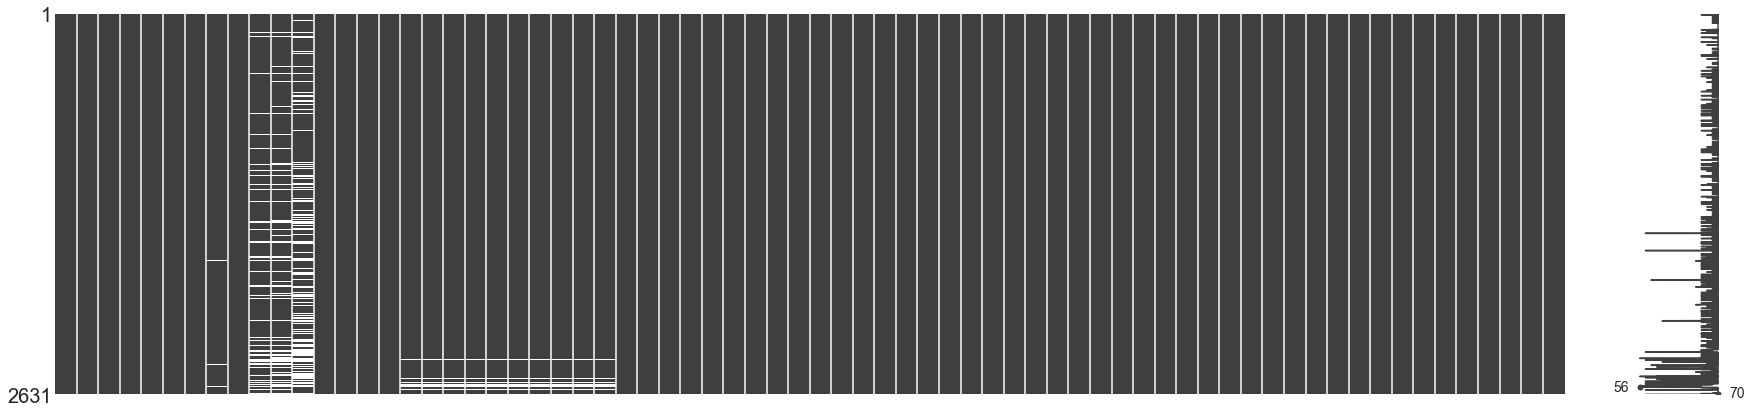

In [13]:
# Plot visualisation of the missing values for each feature of the raw DataFrame, df_21stclub_raw
msno.matrix(df_21stclub_raw, figsize = (30, 7))

In [14]:
# Counts of missing values
tm_null_value_stats = df_21stclub_raw.isnull().sum(axis=0)
tm_null_value_stats[tm_null_value_stats != 0]

age                  14
height              295
weight              392
preferred_foot      780
position_am_perc     35
position_cb_perc     35
position_cf_perc     35
position_cm_perc     35
position_dm_perc     35
position_gk_perc     35
position_lb_perc     35
position_lw_perc     35
position_rb_perc     35
position_rw_perc     35
dtype: int64

The visualisation shows us very quickly that there a few missing values in the `value` column, but otherwise the dataset is complete.

## <a id='#section4'>4. Data Engineering</a>
Before we answer the questions in the brief through [Exploratory Data Analysis (EDA)](#section5), we'll first need to clean and wrangle the datasets to a form that meet our needs.

### <a id='#section4.1'>4.1. Assign Raw DataFrames to New Engineered DataFrames</a>

In [15]:
# Assign Raw DataFrame to new Engineered DataFrame
df_21stclub = df_21stclub_raw

In [16]:
df_21stclub.head()

,season,competition_id,competition,player_id,name,team_id,team,age,nationality,height,...,clearances,saves,aerial_duels_att,aerial_duels_att_won,ground_duels_att,ground_duels_att_won,aerial_duels_def,aerial_duels_def_won,ground_duels_def,ground_duels_def_won
0,2018/2019,70,Championship,173879,Tamaraebi Abraham,7,Aston Villa,22.0,England,190.0,...,45,0,266,109,125,59,35,22,40,24
1,2018/2019,70,Championship,172649,Dean Henderson,49,Sheffield United,23.0,England,188.0,...,21,115,5,4,7,7,18,1,0,0
2,2018/2019,70,Championship,108416,John Egan,49,Sheffield United,27.0,Republic of Ireland,185.0,...,258,0,69,37,21,17,240,82,57,32
3,2018/2019,70,Championship,184341,Mason Mount,24,Derby County,21.0,England,178.0,...,29,0,52,13,106,43,15,10,74,39
4,2018/2019,70,Championship,146610,Jack O'Connell,49,Sheffield United,26.0,England,190.0,...,198,0,49,25,29,25,245,73,30,19


### <a id='#section4.2'>4.2. String Cleaning</a>

##### Name

In [17]:
df_21stclub['name_lower'] = df_21stclub['name'].str.normalize('NFKD')\
                                               .str.encode('ascii', errors='ignore')\
                                               .str.decode('utf-8')\
                                               .str.lower()

In [18]:
# First Name Lower
df_21stclub['firstname_lower'] = df_21stclub['name_lower'].str.rsplit(' ', 0).str[0]

# Last Name Lower
df_21stclub['lastname_lower'] = df_21stclub['name_lower'].str.rsplit(' ', 1).str[-1]

# First Initial Lower
df_21stclub['firstinitial_lower'] = df_21stclub['name_lower'].astype(str).str[0]

### <a id='#section4.3'>4.3. Create New Metrics</a>

New metrics to create include:
- `tackles_p90` = `tackles` / `p90`
- `interceptions_p90` = `interceptions` / `p90`
- `recoveries_p90` = `recoveries` / `p90`
- `deep_progressions_p90` = (`pass_op_box` + `dribbles_box` + `carries_box`) / `p90`
- `blocks_p90` = `blocks` / `p90`
- `carries_p90` = `carries` / `p90`
- `passing_op_%` = (`pass_op_box_successful` + `pass_op_final_third_successful` + `pass_op_head_successful`) / (`pass_op_box` + `pass_op_final_third` + `pass_op_head`)
- `dribbles %` = `dribbles_successful` / `dribbles`
- `launches %` = `launches_successful` / `launches`
- `aerial_duels_%` = (`aerial_duels_att_won` + `aerial_duels_def_won`) / (`aerial_duels_att` + `aerial_duels_def`)
- `ground_duels_%` = (`ground_duels_att_won` + `ground_duels_def_won`) / (`ground_duels_att` + `ground_duels_def`)
- `crosses_op_%` = `crosses_op_successful` / (`crosses_op_left` + `crosses_op_right`)

Where `p90` is a calculated field of `play_time` / 90

In [27]:
sorted(df_21stclub.columns)

['aerial_duels_%',
 'aerial_duels_att',
 'aerial_duels_att_won',
 'aerial_duels_def',
 'aerial_duels_def_won',
 'age',
 'assists',
 'ball_in_play_time',
 'blocks',
 'blocks_p90',
 'carries',
 'carries_box',
 'carries_p90',
 'carry_distance',
 'clearances',
 'competition',
 'competition_id',
 'crosses',
 'crosses_op_%',
 'crosses_op_left',
 'crosses_op_right',
 'crosses_op_successful',
 'crosses_open_play',
 'deep_progressions_p90',
 'detailed_position',
 'dribbles',
 'dribbles_%',
 'dribbles_box',
 'dribbles_successful',
 'firstinitial_lower',
 'firstname_lower',
 'goals',
 'ground_duels_%',
 'ground_duels_att',
 'ground_duels_att_won',
 'ground_duels_def',
 'ground_duels_def_won',
 'height',
 'interceptions',
 'interceptions_p90',
 'lastname_lower',
 'launches',
 'launches_%',
 'launches_successful',
 'name',
 'name_lower',
 'nationality',
 'p90',
 'passes',
 'passes_op_%',
 'passes_op_box',
 'passes_op_box_successful',
 'passes_op_final_third',
 'passes_op_final_third_successful',
 '

In [59]:
df_21stclub['p90'] = df_21stclub['play_time'] / 90

df_21stclub['tackles_p90'] = df_21stclub['tackles'] / df_21stclub['p90']
df_21stclub['interceptions_p90'] = df_21stclub['interceptions'] / df_21stclub['p90']
df_21stclub['recoveries_p90'] = df_21stclub['recoveries'] / df_21stclub['p90']
df_21stclub['deep_progressions_p90'] = (df_21stclub['passes_op_box'] + df_21stclub['dribbles_box'] + df_21stclub['carries_box']) / df_21stclub['p90']
df_21stclub['blocks_p90'] = df_21stclub['blocks'] / df_21stclub['p90']
df_21stclub['carries_p90'] = df_21stclub['carries'] / df_21stclub['p90']
df_21stclub['passes_op_%'] = (df_21stclub['passes_op_box_successful'] + df_21stclub['passes_op_final_third_successful'] + df_21stclub['passes_op_head_successful']) / (df_21stclub['passes_op_box'] + df_21stclub['passes_op_final_third'] + df_21stclub['passes_op_head'])
df_21stclub['dribbles_%'] = df_21stclub['dribbles_successful'] / df_21stclub['dribbles']
df_21stclub['launches_%'] = df_21stclub['launches_successful'] / df_21stclub['launches']
df_21stclub['aerial_duels_%'] = (df_21stclub['aerial_duels_att_won'] + df_21stclub['aerial_duels_def_won']) / (df_21stclub['aerial_duels_att'] + df_21stclub['aerial_duels_def'])
df_21stclub['ground_duels_%'] = (df_21stclub['ground_duels_att_won'] + df_21stclub['ground_duels_def_won']) / (df_21stclub['ground_duels_att'] + df_21stclub['ground_duels_def'])
df_21stclub['crosses_op_%'] = df_21stclub['crosses_op_successful'] / (df_21stclub['crosses_op_left'] + df_21stclub['crosses_op_right'])

In [60]:
df_21stclub.head()

,season,competition_id,competition,player_id,name,team_id,team,age,nationality,height,...,recoveries_p90,deep_progressions_p90,blocks_p90,carries_p90,passes_op_%,dribbles_%,launches_%,aerial_duels_%,ground_duels_%,crosses_op_%
0,2018/2019,70,Championship,173879,Tamaraebi Abraham,7,Aston Villa,22.0,England,190.0,...,3.682098,3.932117,0.636412,20.274266,0.538631,0.610169,0.000000,0.435216,0.503030,0.222222
1,2018/2019,70,Championship,172649,Dean Henderson,49,Sheffield United,23.0,England,188.0,...,0.688608,0.121519,0.000000,16.303797,0.000000,NaN,0.533784,0.217391,1.000000,NaN
2,2018/2019,70,Championship,108416,John Egan,49,Sheffield United,27.0,Republic of Ireland,185.0,...,7.331457,0.720432,1.123027,31.084532,0.553846,1.000000,0.422222,0.385113,0.628205,0.000000
3,2018/2019,70,Championship,184341,Mason Mount,24,Derby County,21.0,England,178.0,...,8.834880,4.477953,0.847180,37.179110,0.616613,0.400000,0.148148,0.343284,0.455556,0.260870
4,2018/2019,70,Championship,146610,Jack O'Connell,49,Sheffield United,26.0,England,190.0,...,8.520145,1.522266,1.090579,44.918206,0.584532,0.454545,0.304545,0.333333,0.745763,0.245614


In [61]:
df_21stclub_5_matches = df_21stclub[df_21stclub['play_time'] >= 450] 

In [62]:
df_21stclub_5_matches.head()

,season,competition_id,competition,player_id,name,team_id,team,age,nationality,height,...,recoveries_p90,deep_progressions_p90,blocks_p90,carries_p90,passes_op_%,dribbles_%,launches_%,aerial_duels_%,ground_duels_%,crosses_op_%
0,2018/2019,70,Championship,173879,Tamaraebi Abraham,7,Aston Villa,22.0,England,190.0,...,3.682098,3.932117,0.636412,20.274266,0.538631,0.610169,0.000000,0.435216,0.503030,0.222222
1,2018/2019,70,Championship,172649,Dean Henderson,49,Sheffield United,23.0,England,188.0,...,0.688608,0.121519,0.000000,16.303797,0.000000,NaN,0.533784,0.217391,1.000000,NaN
2,2018/2019,70,Championship,108416,John Egan,49,Sheffield United,27.0,Republic of Ireland,185.0,...,7.331457,0.720432,1.123027,31.084532,0.553846,1.000000,0.422222,0.385113,0.628205,0.000000
3,2018/2019,70,Championship,184341,Mason Mount,24,Derby County,21.0,England,178.0,...,8.834880,4.477953,0.847180,37.179110,0.616613,0.400000,0.148148,0.343284,0.455556,0.260870
4,2018/2019,70,Championship,146610,Jack O'Connell,49,Sheffield United,26.0,England,190.0,...,8.520145,1.522266,1.090579,44.918206,0.584532,0.454545,0.304545,0.333333,0.745763,0.245614


In [63]:
#

## Min
min_tackles_p90 = df_21stclub_5_matches['tackles_p90'].min()
min_interceptions_p90 = df_21stclub_5_matches['interceptions_p90'].min()
min_recoveries_p90 = df_21stclub_5_matches['recoveries_p90'].min()
min_deep_progressions_p90 = df_21stclub_5_matches['deep_progressions_p90'].min()
min_blocks_p90 = df_21stclub_5_matches['blocks_p90'].min()
min_carries_p90 = df_21stclub_5_matches['carries_p90'].min()
min_passes_op_percentage = df_21stclub_5_matches['passes_op_%'].min()
min_dribbles_percentage = df_21stclub_5_matches['dribbles_%'].min()
min_launches_percentage = df_21stclub_5_matches['launches_%'].min()
min_aerial_duels_percentage = df_21stclub_5_matches['aerial_duels_%'].min()
min_ground_duels_percentage = df_21stclub_5_matches['ground_duels_%'].min()
min_crosses_op_percentage = df_21stclub_5_matches['crosses_op_%'].min()

## Max
max_tackles_p90 = df_21stclub_5_matches['tackles_p90'].max()
max_interceptions_p90 = df_21stclub_5_matches['interceptions_p90'].max()
max_recoveries_p90 = df_21stclub_5_matches['recoveries_p90'].max()
max_deep_progressions_p90 = df_21stclub_5_matches['deep_progressions_p90'].max()
max_blocks_p90 = df_21stclub_5_matches['blocks_p90'].max()
max_carries_p90 = df_21stclub_5_matches['carries_p90'].max()
max_passes_op_percentage  = df_21stclub_5_matches['passes_op_%'].max()
max_dribbles_percentage = df_21stclub_5_matches['dribbles_%'].max()
max_launches_percentage = df_21stclub_5_matches['launches_%'].max()
max_aerial_duels_percentage = df_21stclub_5_matches['aerial_duels_%'].max()
max_ground_duels_percentage = df_21stclub_5_matches['ground_duels_%'].max()
max_crosses_op_percentage = df_21stclub_5_matches['crosses_op_%'].max()

In [64]:
## Print statements
print(f'tackles_p90 minimum value is {min_tackles_p90:.3f} and the maximum value is {max_tackles_p90:.3f}')
print(f'interceptions_p90 minimum value is {min_interceptions_p90:.3f} and the maximum value is {max_interceptions_p90:.3f}')
print(f'recoveries_p90 minimum value is {min_recoveries_p90:.3f} and the maximum value is {max_recoveries_p90:.3f}')
print(f'deep_progressions_p90 minimum value is {min_deep_progressions_p90:.3f} and the maximum value is {max_deep_progressions_p90:.3f}')
print(f'blocks_p90 minimum value is {min_blocks_p90:.3f} and the maximum value is {max_blocks_p90:.3f}')
print(f'carries_p90 minimum value is {min_carries_p90:.3f} and the maximum value is {max_carries_p90:.3f}')
print(f'passes_op_percentage minimum value is {min_passes_op_percentage} and the maximum value is {max_passes_op_percentage}')
print(f'dribbles_percentage minimum value is {min_dribbles_percentage} and the maximum value is {max_dribbles_percentage}')
print(f'launches_percentage minimum value is {min_launches_percentage} and the maximum value is {max_launches_percentage}')
print(f'aerial_duels_percentage minimum value is {min_aerial_duels_percentage} and the maximum value is {max_aerial_duels_percentage}')
print(f'ground_duels_percentage minimum value is {min_ground_duels_percentage} and the maximum value is {max_ground_duels_percentage}')
print(f'crosses_op_percentage minimum value is {min_crosses_op_percentage} and the maximum value is {max_crosses_op_percentage}')

tackles_p90 minimum value is 0.000 and the maximum value is 3.839
interceptions_p90 minimum value is 0.000 and the maximum value is 3.479
recoveries_p90 minimum value is 0.437 and the maximum value is 18.319
deep_progressions_p90 minimum value is 0.000 and the maximum value is 9.464
blocks_p90 minimum value is 0.000 and the maximum value is 3.206
carries_p90 minimum value is 5.690 and the maximum value is 70.783
passes_op_percentage minimum value is 0.0 and the maximum value is 1.0
dribbles_percentage minimum value is 0.0 and the maximum value is inf
launches_percentage minimum value is 0.0 and the maximum value is 1.0
aerial_duels_percentage minimum value is 0.0 and the maximum value is 1.0
ground_duels_percentage minimum value is 0.0 and the maximum value is 1.0
crosses_op_percentage minimum value is 0.0 and the maximum value is 1.0


In [40]:
max_tackles_p90

3.838899989166381

### <a id='#section4.4'>4.4. Split Dataset into Outfielder Players and Goalkeepers</a>

In [ ]:
# Assign df_tm as a new DataFrame - df_tm_player_england_all_2021_all, to represent all the players
df_21stclub_all = df_21stclub

# Filter rows for position_description is not equal to 'Goalkeeper'
df_21stclub_all_outfield = df_21stclub[df_21stclub['position'] != 'Goalkeeper']

# Filter rows for position_description are equal to 'Goalkeeper'
df_21stclub_goalkeeper = df_21stclub[df_21stclub['position'] == 'Goalkeeper']

In [ ]:
df_21stclub_all.head()

In [ ]:
df_21stclub_all_outfield.head()

In [ ]:
df_21stclub_goalkeeper.head()

### <a id='#section4.7'>4.7. Exporting the Engineered DataFrames</a>
Export the three engineered [TransferMarkt](https://www.transfermarkt.co.uk/) DataFrames as CSV files.

In [ ]:
# Datetime
import datetime
from datetime import date
import time

In [ ]:
# Define today's date
today = datetime.datetime.now().strftime('%d/%m/%Y').replace('/', '')

In [ ]:
# Export the three DataFrames
df_21stclub_all.to_csv(data_dir_21st_club + '/engineered/' + '21st_club_all.csv', index=None, header=True)
df_21stclub_all_outfield.to_csv(data_dir_21st_club + '/engineered/' + '21st_club_outfield.csv', index=None, header=True)
df_21stclub_goalkeeper.to_csv(data_dir_21st_club + '/engineered/' + '21st_club_goalkeeper.csv', index=None, header=True)

Now we have created three pandas DataFrames and wrangled the data to meet our needs, we'll next conduct and [Exploratory Data Analysis ](#section5).

## <a id='#section5'>5. Exploratory Data Analysis</a>

### <a id='#section5.1'>5.1. Introduction</a>
...

### <a id='#section5.2'>5.2. ...</a>
...

## <a id='#section6'>6. Summary</a>
This notebook scrapes data for player valuations using [Beautifulsoup](https://pypi.org/project/beautifulsoup4/) from [TransferMarkt](https://www.transfermarkt.co.uk/) using [pandas](http://pandas.pydata.org/) for data maniuplation through DataFrames and [Beautifulsoup](https://pypi.org/project/beautifulsoup4/) for webscraping.

## <a id='#section7'>7. Next Steps</a>
...

## <a id='#section8'>8. References</a>

### <a id='#section9.1'>8.1. Bibliography</a>
...

### <a id='#section9.2'>8.2. Python Techniques Observed</a>
To conduct our analysis, we have used the following libraries and modules for the following tasks:
*    [NumPy](http://www.numpy.org/) for multidimensional array computing,
*    [pandas](http://pandas.pydata.org/) for data manipulation and ingestion, and
*    [Beautifulsoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) for scraping data from webpages.

We have also demonstrated an array of techniques in Python using the following methods and functions:
*    pandas EDA methods:
     +    [head()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html),
     +    [tail()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.tail.html),
     +    [shape](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html),
     +    [columns](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.columns.html),
     +    [dtypes](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html),
     +    [info](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html), and
     +    [describe](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html).
*    The [missingno](https://pypi.org/project/missingno/) library to visualise how many missing values we have in the dataset, and
*    The pandas [.to_csv()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html) method to export the DataFrames as csv files.

---

***Visit my website [EddWebster.com](https://www.eddwebster.com) or my [GitHub Repository](https://github.com/eddwebster) for more projects. If you'd like to get in contact, my Twitter handle is [@eddwebster](http://www.twitter.com/eddwebster) and my email is: edd.j.webster@gmail.com.***

[Back to the top](#top)